### 4-1. 인구현황 데이터 분석

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

data = pd.read_csv('data/인구현황.csv')
print(data.shape)
print(type(data))

#한글폰트 설정
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
# rc(run command)
matplotlib.rc('font', family=font_prop)

(18, 8)
<class 'pandas.core.frame.DataFrame'>
Malgun Gothic


In [3]:
# 1. 지역별 총인구수 Top5
re_df = data.loc[data['행정기관'] != '전국', ['행정기관', '총인구수']].sort_values(by='총인구수', ascending=False).reset_index(drop=True)
re_df.head(5)

,행정기관,총인구수
0,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
3,경상남도,3228380
4,인천광역시,3021010


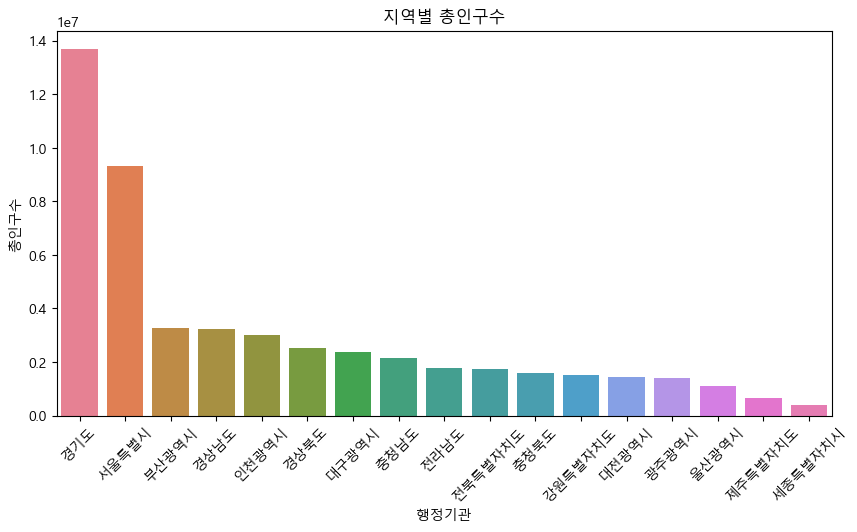

In [4]:
# 1-1. 지역별 총인구수 plot
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10,5)

pop_plot = sns.barplot(data=re_df.sort_values(by='총인구수',ascending=False),x='행정기관',y='총인구수',ax=axes1,hue='행정기관')
pop_plot.set_title(f'지역별 총인구수')

for item in pop_plot.get_xticklabels(): 
    item.set_rotation(45)

plt.show()

In [5]:
# 2. 세대당 인구수 높은 지역 Top5
no_df = data.loc[data['행정기관'] != '전국', ['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)
no_df.head(5)

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


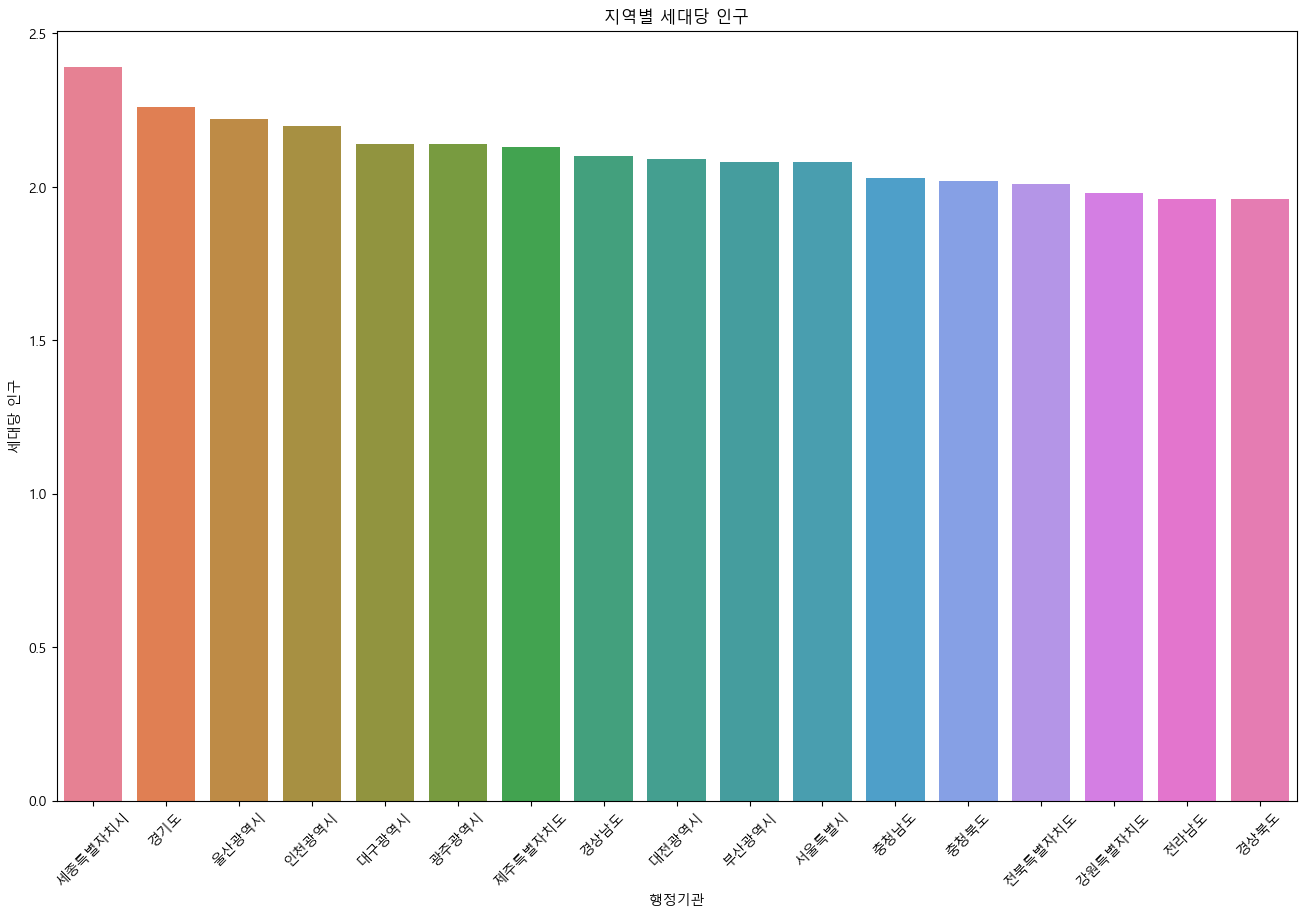

In [6]:

# 2-1. 지역별 세대당 인구 Plot
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(16,10)

pop_plot = sns.barplot(data=no_df.sort_values(by='세대당 인구',ascending=False),x='행정기관',y='세대당 인구',ax=axes1,hue='행정기관')
pop_plot.set_title(f'지역별 세대당 인구')

for item in pop_plot.get_xticklabels(): 
    item.set_rotation(45)

plt.show()

In [7]:
# 3. 남녀 비율 분석
ge_df = data.loc[data['행정기관'] != '전국', ['행정기관', '남여 비율']].sort_values(by='남여 비율', ascending=False).reset_index(drop=True)
ge_df

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


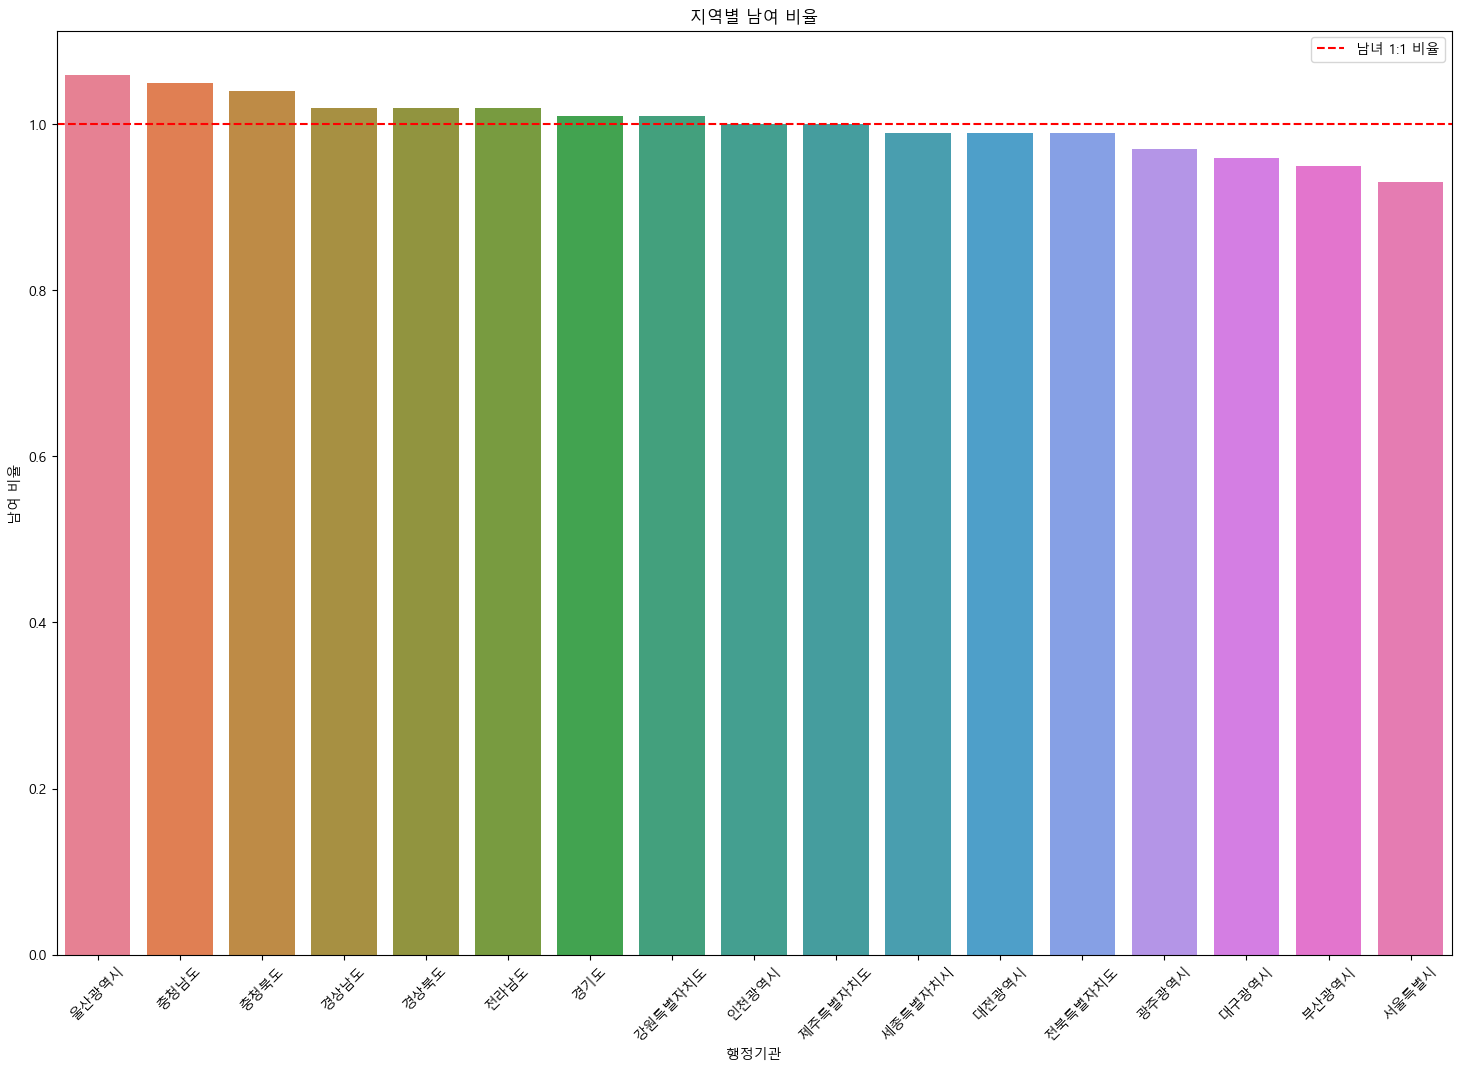

In [12]:
# 3-1. 남녀 비율 분석 Plot
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

pop_plot = sns.barplot(data=ge_df.sort_values(by='남여 비율',ascending=False),x='행정기관',y='남여 비율',ax=axes1,hue='행정기관')
pop_plot.axhline(1, color='red', linestyle='--', label='남녀 1:1 비율')
pop_plot.legend()
pop_plot.set_title(f'지역별 남여 비율')

for item in pop_plot.get_xticklabels(): 
    item.set_rotation(45)

plt.show()

In [9]:
# 4. 남자초과 / 여자초과 분석
import numpy as np

geov_df = data.loc[data['행정기관'] != '전국', ['행정기관', '남여 비율']]
geov_df['남초여초'] = np.where(geov_df['남여 비율'] > 1, '남초',np.where(geov_df['남여 비율'] < 1, '여초', '동일'))

geov_df

,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


In [10]:
# 5. 세대당 인구 평균보다 높은 지역

avg_household = data.loc[data['행정기관'] != '전국', ['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)
avg_no = data.loc[data['행정기관'] != '전국', '세대당 인구'].mean()

print(f'5. 세대당 인구 평균보다 높은 지역\n 전국 평균 세대당 인구수: {avg_no:.2f}')
avg_household

5. 세대당 인구 평균보다 높은 지역
 전국 평균 세대당 인구수: 2.11


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13
7,경상남도,2.10
8,대전광역시,2.09
9,부산광역시,2.08


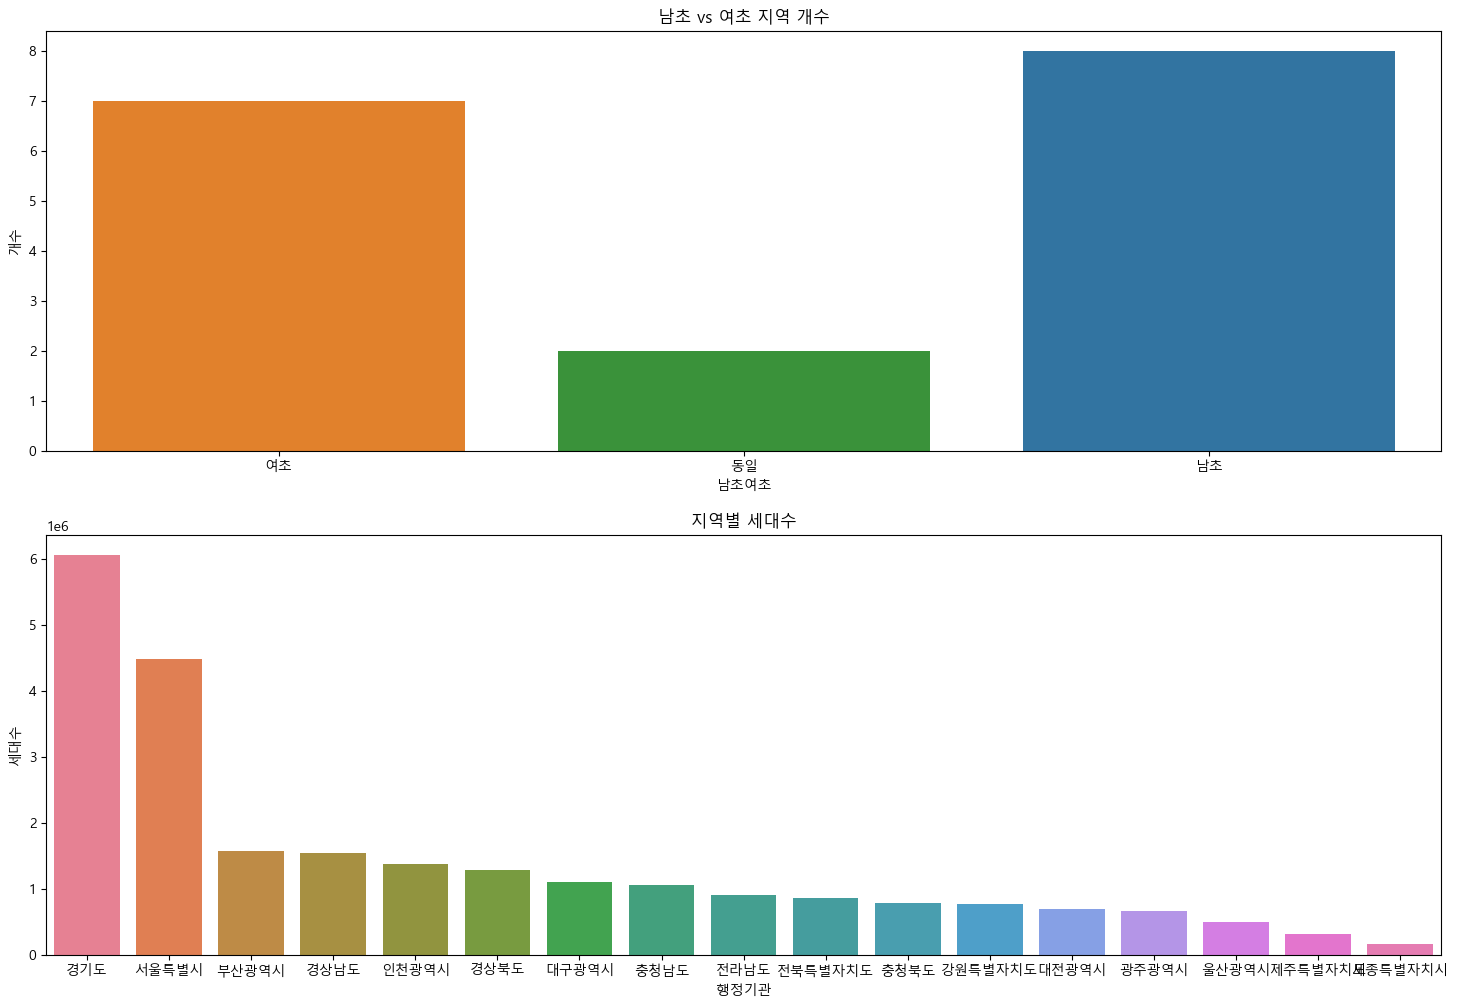

In [11]:
# 5-1.   남초 vs 여초 개수 Plot  ( seaborn의 countplot 지역별 세대수 Plot ( seaborn의 barplot )
household_df = data.loc[data['행정기관'] != '전국', ['행정기관', '세대수']].sort_values(by='세대수', ascending=False).reset_index(drop=True)
gender_count = geov_df['남초여초'].value_counts().reset_index()
gender_count.columns = ['남초여초', '개수']

figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)

household_plot = sns.barplot(data=household_df.sort_values(by='세대수',ascending=False),x='행정기관',y='세대수',ax=axes2,hue='행정기관')
household_plot.set_title(f'지역별 세대수')

geov_plot = sns.barplot(data=gender_count, x='남초여초',y='개수',order = ['여초', '동일', '남초'], ax=axes1,hue='남초여초')
geov_plot.set_title(f'남초 vs 여초 지역 개수')

plt.show()